In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('./train.csv')
x = train.drop(['허위매물여부'],axis=1)
y = train['허위매물여부']

display(x.describe(), x.info(), x.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 306.6+ KB


,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000


None

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25
5,TRAIN_0005,전화확인,153000000.0,530000,29.50,NaN,3.0,남향,2.0,1.0,가능,1.0,0,Q42YF3Y0I2,A플랫폼,2024-09-12
6,TRAIN_0006,현장확인,348500000.0,400000,NaN,2.0,3.0,북동향,1.0,1.0,불가능,NaN,0,A72Mx9C8U2,D플랫폼,2024-08-23
7,TRAIN_0007,현장확인,139500000.0,590000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,d22DX4Y4P8,B플랫폼,2025-03-03
8,TRAIN_0008,현장확인,120500000.0,440000,31.55,1.0,2.0,북향,2.0,2.0,가능,18.0,3,G52Iz8V2B9,B플랫폼,2024-05-23
9,TRAIN_0009,현장확인,79500000.0,260000,39.66,2.0,3.0,남동향,2.0,1.0,불가능,2.0,0,M90Ph8W9V3,B플랫폼,2024-11-30


In [ ]:
# 삭제할 열
drop_columns = ['ID', '주차가능여부', '방수', '욕실수', '매물확인방식', '제공플랫폼']

# SimpleImputer : 평균 대체
mean_imputer = SimpleImputer(strategy='mean')

# 결측값 대체할 열 목록
columns_fill_mean = ['해당층', '총층', '전용면적']
columns_fill_zero = ['총주차대수']

# 학습 데이터에 fit 및 transform
x[columns_fill_mean] = mean_imputer.fit_transform(x[columns_fill_mean])
x[columns_fill_zero] = x[columns_fill_zero].fillna(0)

x = x.drop(columns=drop_columns)

# Label Encoding 적용 열
label_encode_cols = ['게재일', '중개사무소', '방향']

label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col].astype(str))
    label_encoders[col] = le

x = pd.concat([x.drop(columns=one_hot_cols), x_encoded_df], axis=1)

display(x.head(), x.columns)

,보증금,월세,전용면적,해당층,총층,방향,총주차대수,관리비,중개사무소,게재일
0,402500000.0,470000,27.009628,4.848403,15.0,7,40.0,96,240,394
1,170500000.0,200000,27.009628,3.000000,4.0,0,0.0,0,228,472
2,114000000.0,380000,27.009628,2.000000,3.0,3,0.0,0,150,444
3,163500000.0,30000,36.300000,3.000000,9.0,0,13.0,10,31,442
4,346000000.0,530000,27.009628,3.000000,3.0,3,0.0,0,72,288


Index(['보증금', '월세', '전용면적', '해당층', '총층', '방향', '총주차대수', '관리비', '중개사무소', '게재일'], dtype='object')

In [ ]:
model = RandomForestClassifier(n_estimators=100,
                               criterion='gini',
                               max_depth=None,
                               random_state=42)
model.fit(x, y)

RandomForestClassifier(random_state=42)

,Feature,Importance
9,게재일,0.337263
8,중개사무소,0.165745
7,관리비,0.113322
6,총주차대수,0.095942
1,월세,0.085692
0,보증금,0.053934
4,총층,0.043932
5,방향,0.042326
2,전용면적,0.035361
3,해당층,0.026483


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '게재일'),
  Text(1, 0, '중개사무소'),
  Text(2, 0, '관리비'),
  Text(3, 0, '총주차대수'),
  Text(4, 0, '월세'),
  Text(5, 0, '보증금'),
  Text(6, 0, '총층'),
  Text(7, 0, '방향'),
  Text(8, 0, '전용면적'),
  Text(9, 0, '해당층')])

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) miss

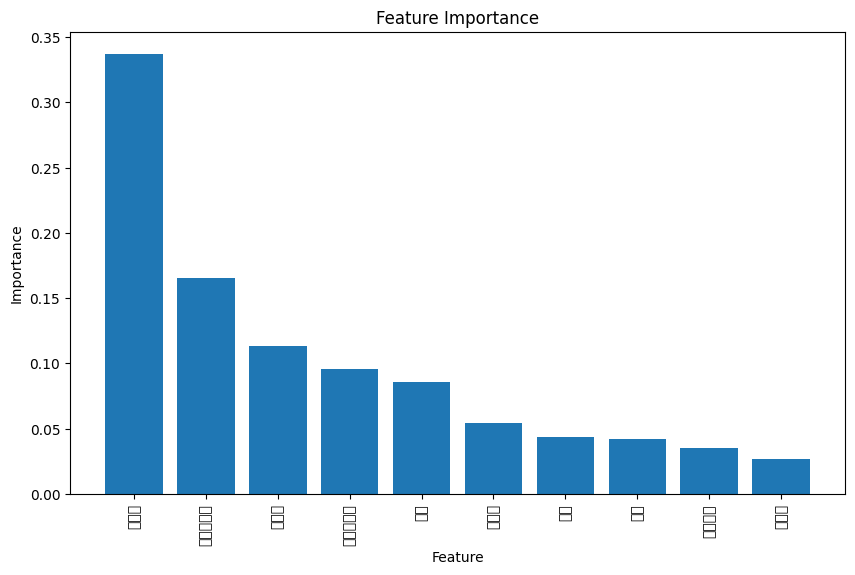

In [ ]:
import matplotlib.pyplot as plt

features = x.columns
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

display(feature_importance_df)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)

In [ ]:
# Test 데이터 로드
test = pd.read_csv('./test.csv')

In [ ]:


# Test 결측값 대체
test[columns_fill_mean] = mean_imputer.transform(test[columns_fill_mean])
test[columns_fill_zero] = test[columns_fill_zero].fillna(0)

test = test.drop(columns=drop_columns)

# Label Encoding
for col in label_encode_cols:
    if col in test.columns:
        le = label_encoders[col]
        test[col] = test[col].astype(str)
        unseen = set(test[col].unique()) - set(le.classes_)
        if unseen:
            le.classes_ = np.append(le.classes_, list(unseen))
        test[col] = le.transform(test[col])

test.head()

,보증금,월세,전용면적,해당층,총층,방향,총주차대수,관리비,중개사무소,게재일
0,223000000.0,530000,27.009628,5.0,5.0,2,0.0,7,145,406
1,150500000.0,590000,30.260000,7.0,11.0,7,16.0,11,31,25
2,47000000.0,200000,41.500000,2.0,3.0,1,0.0,0,72,209
3,133000000.0,250000,31.350000,5.0,6.0,2,0.0,5,12,374
4,108000000.0,380000,23.140000,2.0,3.0,2,0.0,0,142,426


In [ ]:
pred = pd.Series(model.predict(test))

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['허위매물여부'] = pred
submit.head()

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,1
3,TEST_003,0
4,TEST_004,0


In [ ]:
submit.to_csv('./baseline_submission.csv',index=False)